In [203]:
# Objectives:

# 1. Combine all 3 production data files into a single Excel file called "Production data combined.xlsx". Ensure there is only one set of headings.
# 2. Calculate the total number of each type of unit produced.
# 3. Determine the 5 days with the highest production
# 4. Determine the 5 days with the lowest production

In [204]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Assign each excel file into a dataframe
df_aug = pd.read_excel("datasets\Production Aug 2023.xlsx", skiprows=3)
df_sep = pd.read_excel("datasets\Production Sep 2023.xlsx", skiprows=3)
df_oct = pd.read_excel("datasets\Production Oct 2023.xlsx", skiprows=3)

<h1>Data Preprocessing</h1>

<h2>Data Understanding</h2>

In [206]:
# Quick look at August dataset
df_aug.head()

,Date,Product,Quantity
0,2023-08-01,Product B,204
1,2023-08-02,Product B,33
2,2023-08-03,Product B,385
3,2023-08-04,Product B,348
4,2023-08-05,Product B,78


In [207]:
# Quick look at September dataset
df_sep.head()

,Date,Product,Quantity
0,2023-09-01,Product B,172
1,2023-09-02,Product B,378
2,2023-09-03,Product B,249
3,2023-09-04,Product A,57
4,2023-09-05,Product B,31


In [208]:
# Quick look at October dataset
df_oct.head()

,Date,Product,Quantity
0,2023-10-01,Product B,197
1,2023-10-02,Product B,56
2,2023-10-03,Product A,340
3,2023-10-04,Product B,217
4,2023-10-05,Product B,298


In [209]:
# Lets look at the data types we are dealing with

# Data types for Aug dataset
print(df_aug.dtypes)

Date        datetime64[ns]
Product             object
Quantity             int64
dtype: object


In [210]:
# Data types for Sept dataset
print(df_sep.dtypes)

Date        datetime64[ns]
Product             object
Quantity             int64
dtype: object


In [211]:
# Data types for Oct dataset
print(df_oct .dtypes)

Date        datetime64[ns]
Product             object
Quantity             int64
dtype: object


In [212]:
# Lets create a "Production data combined" dataframe
df_combined = pd.concat([df_aug, df_sep, df_oct])

# Quick peek
df_combined

,Date,Product,Quantity
0,2023-08-01,Product B,204
1,2023-08-02,Product B,33
2,2023-08-03,Product B,385
3,2023-08-04,Product B,348
4,2023-08-05,Product B,78
...,...,...,...
26,2023-10-27,Product B,394
27,2023-10-28,Product B,48
28,2023-10-29,Product A,173
29,2023-10-30,Product B,404


In [213]:
# Lets have a look at the shapes of the previous data frames to make sure no records went missing
print("Shape of Aug df: ")
print(df_aug.shape)

Shape of Aug df: 
(31, 3)


In [214]:
print("Shape of Sep df: ")
print(df_sep.shape)

Shape of Sep df: 
(30, 3)


In [215]:
print("Shape of Oct df: ")
print(df_oct.shape)

Shape of Oct df: 
(31, 3)


In [216]:
# 92 total rows for all three dataframes

print("Shape of combined df: ")
print(df_combined.shape)

Shape of combined df: 
(92, 3)


In [217]:
# Our combined dataframe has 92 rows meaning none has been lost

# Our merging was successful

<h2>Outputting Merged Excel File</h2>

In [218]:
# Output our merged dataframe into an excel file
df_combined.to_excel("Production data combined.xlsx", index=False)  

In [219]:
# Lets have a look at our merged dataframe
df_combined.head()

,Date,Product,Quantity
0,2023-08-01,Product B,204
1,2023-08-02,Product B,33
2,2023-08-03,Product B,385
3,2023-08-04,Product B,348
4,2023-08-05,Product B,78


<h1>Data Analysis</h1>

In [220]:
# Reiterating, the objectives of the analysis are:

# 2. Calculate the total number of each type of unit produced.
# 3. Determine the 5 days with the highest production
# 4. Determine the 5 days with the lowest production

<h2>Total Number of Each Unit Produced</h2>

In [221]:
# Lets see how many Product types we are dealing with
print(df_combined['Product'].unique())

['Product B' 'Product A']


In [222]:
# We are only dealing with two types of products, A and B

# Lets create two variables to store a numerical count of each product type

totalProductA = df_combined[df_combined['Product'] == 'Product A']['Quantity'].sum()
print("Total Product A: ", totalProductA)

totalProductB = df_combined[df_combined['Product'] == 'Product B']['Quantity'].sum()
print("Total Product B: ", totalProductB)


Total Product A:  13242
Total Product B:  10781


<h2>Exploratory Analysis</h2>

In [223]:
# Lets have a look at the summary statistics of our dataset

df_combined.describe()

,Quantity
count,92.000000
mean,261.119565
std,158.178286
min,1.000000
25%,145.500000
50%,262.500000
75%,385.500000
max,598.000000


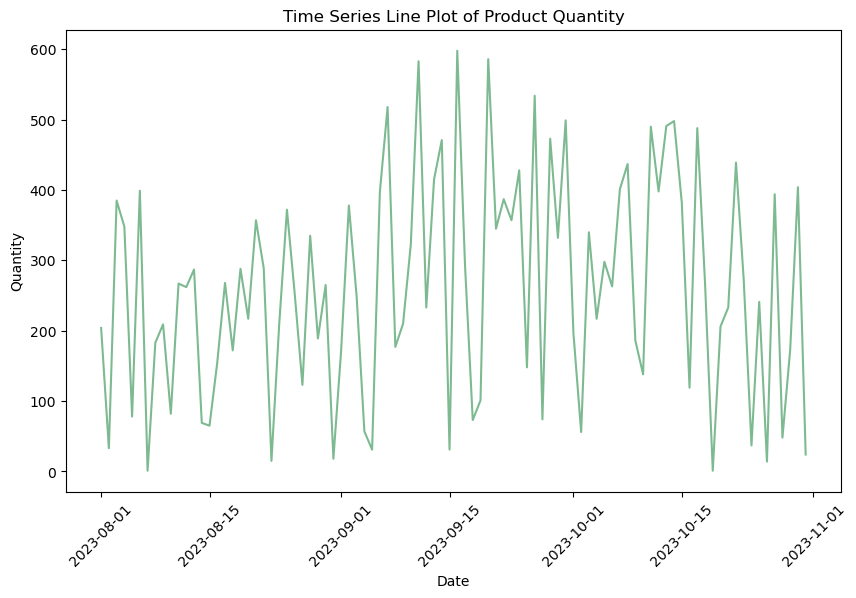

In [224]:
# Lets have a look at a line plot of our dataset

# Resizing plot (must be defined prior to defining plot type)
plt.figure(figsize=(10, 6))

# Defining plot type
sns.lineplot(data=df_combined, x='Date', y='Quantity')

# Plot characteristics
plt.title('Time Series Line Plot of Product Quantity')
plt.xticks(rotation=45)

# Display plot
plt.show()

<h2>5 Days of Highest Production</h2>

In [225]:
highest_production = df_combined.sort_values(by='Quantity', ascending=False).head(5)
print(highest_production)

         Date    Product  Quantity
15 2023-09-16  Product A       598
19 2023-09-20  Product A       586
10 2023-09-11  Product A       583
25 2023-09-26  Product A       534
6  2023-09-07  Product B       518


<h2>5 Days of Lowest Production</h2>

In [226]:
lowest_production = df_combined.sort_values(by='Quantity', ascending=True).head(5)
print(lowest_production)

         Date    Product  Quantity
18 2023-10-19  Product A         1
6  2023-08-07  Product A         1
25 2023-10-26  Product B        14
22 2023-08-23  Product B        15
30 2023-08-31  Product B        18


<h1>Visualisations</h1>

In [227]:
# Set Seaborn palette here so it is consistent across all visualisations
sns.set_palette("crest")

<h2>Lowest and Highest Production days in Time Series</h2>

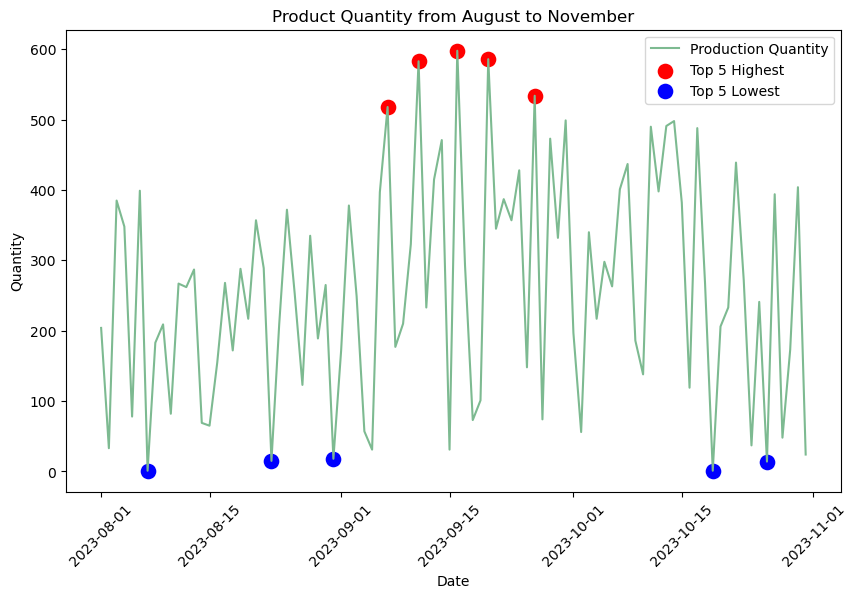

In [228]:
# Resizing plot
plt.figure(figsize=(10, 6))

# Defining the line plot - Same as our time series plot from earlier
sns.lineplot(data=df_combined, x='Date', y='Quantity', label='Production Quantity')

# Overlays two scatter plots that has our highest and lowest data from earlier onto our time series plot from earlier
# Adding scatter plots to highlight the highest and lowest production days
sns.scatterplot(data=highest_production, x='Date', y='Quantity', color='red', label='Top 5 Highest', s=150)
sns.scatterplot(data=lowest_production, x='Date', y='Quantity', color='blue', label='Top 5 Lowest', s=150)

# Plot characteristics
plt.title('Product Quantity from August to November')
plt.xticks(rotation=45)
plt.legend()

# Display plot
plt.show()

<h2>Time Series by Product Type</h2>

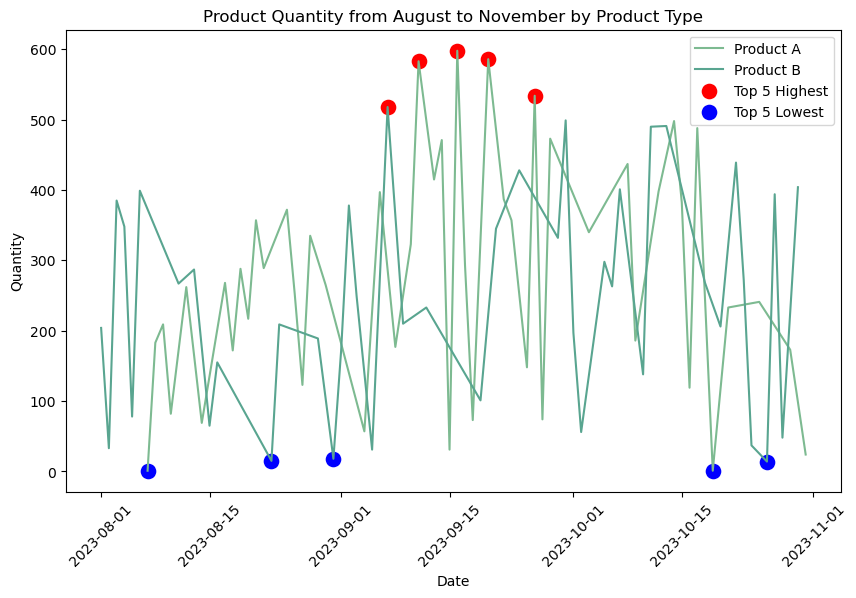

In [229]:
# Product data
productA = df_combined[df_combined['Product'] == 'Product A']
productB = df_combined[df_combined['Product'] == 'Product B']

# Resizing plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=productA, x='Date', y='Quantity', label='Product A')
sns.lineplot(data=productB, x='Date', y='Quantity', label='Product B')

# Overlays two scatter plots that has our highest and lowest data from earlier onto our time series plot from earlier
# Adding scatter plots to highlight the highest and lowest production days
sns.scatterplot(data=highest_production, x='Date', y='Quantity', color='red', label='Top 5 Highest', s=150)
sns.scatterplot(data=lowest_production, x='Date', y='Quantity', color='blue', label='Top 5 Lowest', s=150)

# Plot characteristics
plt.title('Product Quantity from August to November by Product Type')
plt.xticks(rotation=45)
plt.legend()

# Display plot
plt.show()